# Machine learning project

### FIRA, Seoul National University
### AI agent, Machine Learning class

## Project description
The objective of this project is to apply learnt machine learning techniques to the Wisconsin Diagnostic Breast Cancer (WDBC) data. The WDBC data is class labeled, hence it will be a classification problem. The data has two classes (B=Benign, M=Malignant) and 32 attributes, or features.

Using the following machine learning techniques, you are asked to build classifiers to predict the classes of the data. For the machine learning techniques, use 1) **Linear regression**, 2) **Random Forest**, 3) **Neural network** and 4) **K-means algorithm**.

Despite the data has label information, the unsupervised K-means clustering shall be applied to the data to compare it with the classification results (i.e., does the clustering algorithm well differentiate the Benign data from the Malignant data without using the label data?). 

### Data Description
* Data Set Characteristics:  	Multivariate	
* Number of Instances:	569	
* Area:	Life
* Attribute Characteristics:	Real	
* Number of Attributes:	32	
* Date Donated	1995-11-01
* Associated Tasks:	Classification	
* Missing Values?	No	
* Number of Web Hits:	563646

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

* Data file: “wdbc.data”
* Class distribution: 357 benign, 212 malignant (total 569 data)
* Attribute Information:
The attribute or features are measured from each image as shown above. Below is the description of each feature column in the “wdbc.data” file. 
1. ID number 
2. Diagnosis (M = malignant, B = benign)  this is the class label
3-32) 
Ten real-valued features are computed for each cell nucleus: 
a. radius (mean of distances from center to points on the perimeter) 
b. texture (standard deviation of gray-scale values) 
c. perimeter 
d. area 
e. smoothness (local variation in radius lengths) 
f. compactness (perimeter^2 / area - 1.0) 
g. concavity (severity of concave portions of the contour) 
h. concave points (number of concave portions of the contour) 
i. symmetry 
j. fractal dimension ("coastline approximation" - 1)
* The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius. All feature values are recoded with four significant digits.

Missing attribute values: none

### Project tasks

1.	Build classifiers using Linear Regression, Random Forest and Neural Networks
2.	Perform cross validation to measure each methods classification accuracy
3.	Discuss the result of each method
    * A.	Linear Regression: What are the coefficients of the Linear Regression
    * B.	Random Forest: What 5 features are the most informative and what are their information strength (i.e., information gain)?
    * C.	Neural Network: How does the classification accuracy change with different number of hidden layers?
4.	Perform K-means clustering
    * A.	Measure the rand index, and silhouette scores
    * B.	How does the score change with K={2,3,…, 10}?
    * C.	Discuss the result of the clustering by comparing it with the classification results

The report shall include the following contents and shall be less than 5 pages:
-	Introduction (One paragraph)
-	Method
-	Results
-	Discussion
-	Conclusion


# Introduction

# Method

## Cleaning data

In [1]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

%matplotlib inline
np.random.seed(923)

### Loading the data

In [2]:
wdbc_master = load_breast_cancer()

In [3]:
COL_NAMES = wdbc_master['feature_names']
COL_NAMES_TARGET = ['label']
DATA = wdbc_master['data']
TARGET = wdbc_master['target']

In [4]:
wdbc_original= pd.DataFrame(DATA, columns=COL_NAMES)
wdbc_original.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Scaling the data

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
wdbc_data_scaled = scaler.fit_transform(DATA.astype(np.float64))

In [6]:
wdbc_data= pd.DataFrame(wdbc_data_scaled, columns=COL_NAMES)
wdbc_target = pd.DataFrame(TARGET, columns=COL_NAMES_TARGET)
wdbc_target = pd.get_dummies(wdbc_target['label'])
wdbc_target.head(5)

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


### Exploratory data analysis

In [7]:
wdbc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [8]:
wdbc_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,...,-2.333224e-15,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


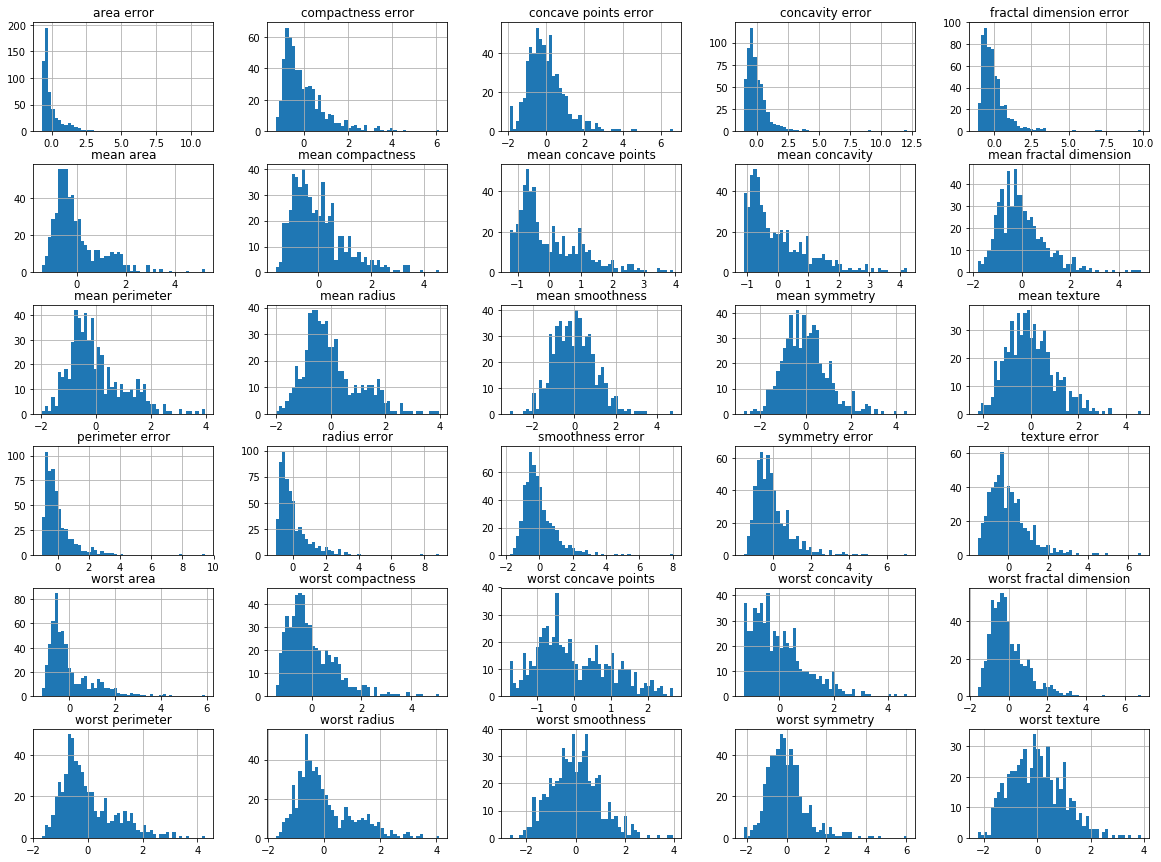

In [9]:
wdbc_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [10]:
X_train, X_test = train_test_split(wdbc_data, test_size=0.2, random_state=923)
y_train, y_test = train_test_split(wdbc_target, test_size=0.2, random_state=923)
X_train.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
227,0.247862,-0.879550,0.225762,0.084216,-0.900263,0.099666,-0.298172,-0.286807,0.253307,-0.528427,...,0.029159,-1.036863,0.206678,-0.127243,-0.822738,0.689798,0.326287,0.354685,0.086138,-0.018055
399,-0.660984,-0.472313,-0.688248,-0.634204,-0.390718,-0.796360,-0.756680,-0.839314,0.129175,-0.369656,...,-0.583805,-0.193332,-0.633283,-0.560041,-0.349310,-0.519504,-0.610669,-0.929526,-0.196974,-0.151608
178,-0.317327,0.681912,-0.410215,-0.365436,-2.408970,-1.610136,-1.094848,-1.214049,-1.521051,-1.482475,...,-0.469910,0.544350,-0.568350,-0.477771,-2.240829,-1.399158,-1.267561,-1.604080,-0.979980,-1.413980
31,-0.649623,-0.137215,-0.578271,-0.609460,1.034726,0.895628,0.414323,0.074825,1.786704,2.153679,...,0.114063,0.397791,0.361564,0.014269,1.373440,2.056226,2.031327,0.608969,3.009467,3.117372
96,-0.553058,-0.337343,-0.584037,-0.579597,0.579267,-0.640010,-0.802254,-0.503219,0.322675,0.503588,...,-0.712196,-0.774684,-0.748256,-0.677470,-0.805204,-1.022181,-1.066914,-0.849434,-1.089989,-0.564455


# Results

## Linear Regression

### Training a model

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Evaluating the linear model by MSE

In [12]:
from sklearn.metrics import mean_squared_error
cancer_prediction = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, cancer_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.2457673454795026

## Random Forest

### Training a model

In [13]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=923)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=923,
            verbose=0, warm_start=False)

### Random Forest Accuracy

In [14]:
from sklearn.metrics import accuracy_score

forest_pred = forest_clf.predict(X_test)

print(forest_clf.__class__.__name__, accuracy_score(y_test, forest_pred))

RandomForestClassifier 0.956140350877


# Neural Networks

In [15]:
import tensorflow as tf

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [33]:
reset_graph()

n_inputs = 30
n_hidden1 = 50
n_hidden2 = 50
n_outputs = 2

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None, n_outputs), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    tf.summary.scalar('cross_entropy', loss)

learning_rate = 0.0001

with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    tf.summary.scalar('accuracy', accuracy)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [34]:
def fetch_batch(X_train, y_train, batch_size):
    np.random.seed(epoch * n_batches + batch)  
    indices = np.random.randint(len(X_train), size=batch_size)  
    X_batch = X_train.values[indices]
    y_batch = y_train.values.reshape(-1, 2)[indices]
    
    return X_batch, y_batch

In [35]:
n_epochs = 150
batch_size = 32
n_batches = int(np.ceil(X_train.shape[0])/batch_size)

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for batch in range(n_batches):
            X_batch, y_batch = fetch_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
        if epoch % 5 == 0:
            acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
            print(epoch, "Batch accuracy:", acc_train, "Validation accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.59375 Validation accuracy: 0.578947
5 Batch accuracy: 0.9375 Validation accuracy: 0.798246
10 Batch accuracy: 0.90625 Validation accuracy: 0.885965
15 Batch accuracy: 0.90625 Validation accuracy: 0.912281
20 Batch accuracy: 0.90625 Validation accuracy: 0.912281
25 Batch accuracy: 0.84375 Validation accuracy: 0.929825
30 Batch accuracy: 0.96875 Validation accuracy: 0.938596
35 Batch accuracy: 0.9375 Validation accuracy: 0.938597
40 Batch accuracy: 0.96875 Validation accuracy: 0.964912
45 Batch accuracy: 0.96875 Validation accuracy: 0.973684
50 Batch accuracy: 1.0 Validation accuracy: 0.973684
55 Batch accuracy: 0.9375 Validation accuracy: 0.973684
60 Batch accuracy: 0.90625 Validation accuracy: 0.973684
65 Batch accuracy: 0.96875 Validation accuracy: 0.973684
70 Batch accuracy: 1.0 Validation accuracy: 0.973684
75 Batch accuracy: 0.9375 Validation accuracy: 0.982456
80 Batch accuracy: 0.96875 Validation accuracy: 0.982456
85 Batch accuracy: 1.0 Validation accuracy: 0

## K-Means Clustering

### Training a model

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=923).fit(X_train)

### K-Means clustering performance evaluation

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

kmeans_pred = kmeans.predict(X_test)

print('K-Means adjusted rand index :' + str(adjusted_rand_score(y_test['label'], kmeans_pred)))
print('K-Means silhouette score :' +  str(silhouette_score(y_test, kmeans_pred)))

# Discussion

## The coefficients of the linear regression model

In [ ]:
lin_reg_coef = pd.DataFrame(lin_reg.coef_, columns = COL_NAMES)
lin_reg_coef

## The most informative features in the random forest model: Rank 5

In [ ]:
feature_rank = pd.DataFrame(forest_clf.feature_importances_, columns=['feat_importance'])
feature_rank['feat_name'] = pd.Series(COL_NAMES, index=feature_rank.index)
feature_rank = feature_rank.sort_values('feat_importance', ascending=False)
feature_rank.head(5)

## Discuss the result of the K-Means clustering

In [ ]:
kmeans_pred

## How does the classification accuracy change with different number of hidden layers?